In [1]:
#Se importa la librería de Pandas
import pandas as pd

In [2]:
#Se extraen los datos del txt y se cargan dichos datos en "df" (DataFrame)
df = pd.read_csv('C:/Users/PC/OneDrive/Documents/Cursos/Python for Data Analysis - IDAT\Proyecto final/dataset.txt')
#Se imprimen los datos del DataFrame
df

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52
...,...,...,...,...,...
150145,212638,9984,235.8375,235.8375,38
150146,212639,9984,235.8375,235.8375,30
150147,212642,9984,357.6750,483.7875,31
150148,212643,9984,141.7875,191.6625,12


In [3]:
#Se imprime un resumen del DataFrame
df.info()
#Se suma la cantidad de valores nulos por columna
df.isnull().sum() #Se verifica que en la columna 'Total Price' existe un valor nulo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

In [4]:
#Se muestran datos estadísticos a partir de las columnas más relevantes del DataFrame
columnas = ["Total Price", "Base Price", "Units Sold"]
df[columnas].describe() 

,Total Price,Base Price,Units Sold
count,150149.000000,150150.000000,150150.000000
mean,206.626751,219.425927,51.674206
std,103.308516,110.961712,60.207904
min,41.325000,61.275000,1.000000
25%,130.387500,133.237500,20.000000
50%,198.075000,205.912500,35.000000
75%,233.700000,234.412500,62.000000
max,562.162500,562.162500,2876.000000


In [5]:
#Se filtran las filas donde el precio final sea igual al precio base
filtro = df["Total Price"] == df["Base Price"] 
df[filtro]["ID"].count() #Se cuentan con 109,383 ventas

np.int64(109382)

In [6]:
#Se filtran las filas donde el precio final es mayor al precio base
filtro = df["Total Price"] > df["Base Price"] 
df[filtro]["ID"].count() #Se cuentan con 3,399 ventas

np.int64(3399)

In [7]:
#Se filtran las filas donde el precio final es menor al precio base
filtro = df["Total Price"] < df["Base Price"] 
df[filtro]["ID"].count() #Se cuentan con 37,368 ventas

np.int64(37368)

In [8]:
#Se realiza un conteo de las tiendas que han realizado ventas
cantidad_tiendas = df["Store ID"].nunique()
cantidad_tiendas #Se cuentan con 76 tiendas

76

In [9]:
#Se imprime la fila con el valor nulo a través de la variable filtro
#Para ello, se accede a la columna 'Total Price' del df 
#y a través de la función 'isna()' se obtiene True si el valor es nulo y False si no lo es
#luego, a través de serie booleana, se mantienen las filas que contengan el valor True
#Finalmente, se imprime la variable filtro
filtro = df[df['Total Price'].isna()] #Con la función isna() se obtienen los valores nulos de "Total Price" (True)
#Luego, se utiliza dicha serie booleana como filtro, manteniendo las filas con valor True (nulos)
filtro

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,NaN,469.5375,1


In [10]:
#Debido a que se trata de un caso puntual y que la columna 'Base Price' no es nulo, 
#se procede a reemplazar dicho valor a UnitPrice
df.loc[df['Total Price'].isna(), 'Total Price'] = df['Base Price'] #Con la función loc, se localiza la fila con el valor nulo en "Total Price"
#Luego, se iguala el valor con el de "Base Price"
df[df.index == 136949] #Se imprime el resultado a partir del índice de la consulta anterior

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,469.5375,469.5375,1


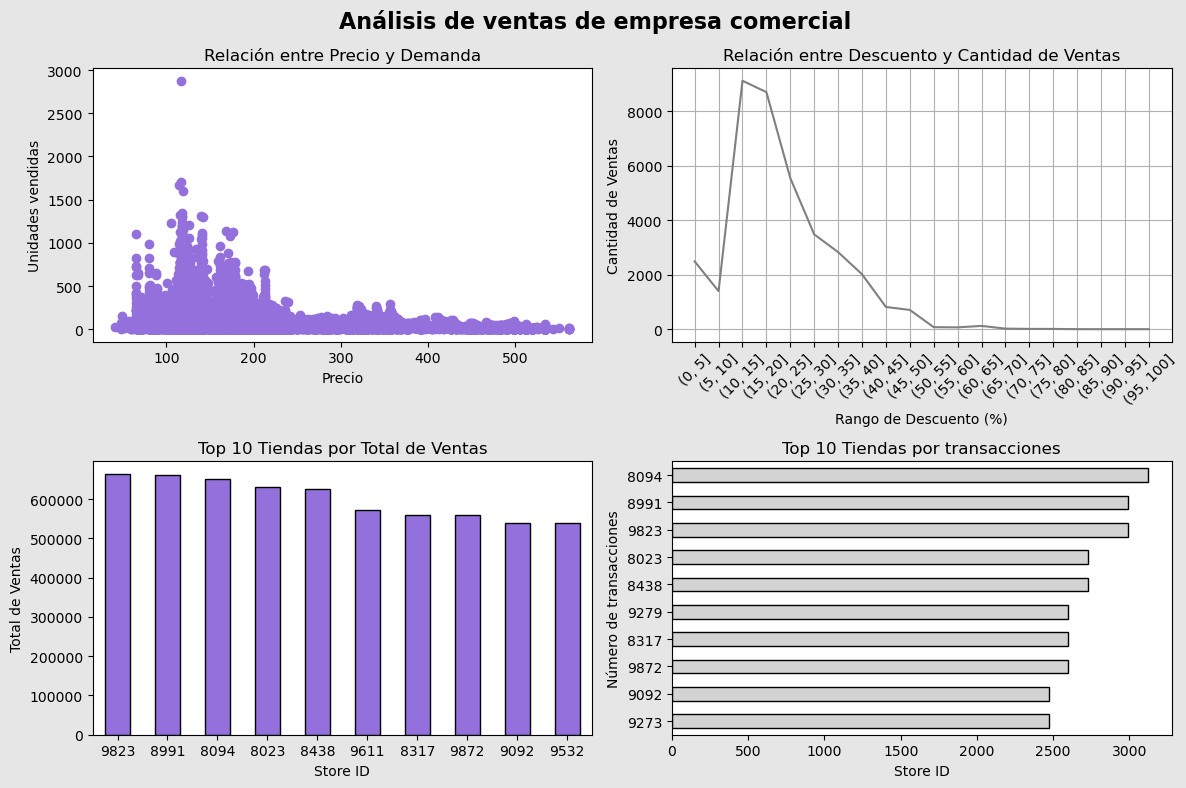

In [11]:
#Se importa la librería de MatPlotLib
import matplotlib.pyplot as plt

#Se crea una figura con 4 axes(ejes), con un tamaño de 12 de ancho y 8 de alto
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12,8))

#Se cambia el título general de la fila y el color de fondo
fig.suptitle("Análisis de ventas de empresa comercial", fontsize=16, fontweight="bold")
fig.patch.set_facecolor("#e6e6e6") #El código hexadecimal es un color gris más claro

#Primer gráfico
#Se selecciona el eje ubicado en la primera fila y columna
ax1 = axs[0,0]
#Se crea un gráfico de dispersión, de color medio morado, con Total Price y Units Sold
ax1.scatter(df['Total Price'], df['Units Sold'], color="mediumpurple")
#Se agrega un título general al gráfico y a los ejes X y Y
ax1.set_title("Relación entre Precio y Demanda")
ax1.set_ylabel("Unidades vendidas")
ax1.set_xlabel("Precio")

#Segundo gráfico
#Se selecciona el eje ubicado en la primera fila y segunda columna
ax2 = axs[0,1]
#Se calcula el porcentaje de descuento aplicado usando las columnas Base Price y Total Price
df['Descuento %'] = ((df['Base Price'] - df['Total Price']) / df['Base Price']) * 100

#Se filtran solo las ventas con descuento mayor o igual a 0
#Se utiliza .copy() para evitar mostrar warnings
ventas_con_descuento = df[df['Descuento %'] >= 0].copy()

#Se crea un rango de descuentos de 5 en 5
ventas_con_descuento['Rango de descuento'] = pd.cut(ventas_con_descuento['Descuento %'], bins=range(0, 105, 5))

#Se cuentan las ventas por el rango de descuento creado
ventas_por_rango = ventas_con_descuento.groupby('Rango de descuento', observed=False)['ID'].count()

#Se crea un gráfico de líneas, de color gris, con el rango de descuentos y su cantidad respectiva
ax2.plot(ventas_por_rango.index.astype(str), ventas_por_rango.values, color = "gray")
#Se agrega un título general al gráfico y a los ejes X y Y, una grilla y se rotan los valores del X a 45 grados
ax2.set_ylabel("Cantidad de Ventas")
ax2.set_xlabel("Rango de Descuento (%)")
ax2.set_title("Relación entre Descuento y Cantidad de Ventas")
ax2.tick_params(axis="x", rotation=45)
ax2.grid()

# Tercer gráfico
#Se selecciona el eje ubicado en la segunda fila y primera columna
ax3 = axs[1,0]
#Se calcula el total de ventas por tienda y se ordena de manera descendente
total_ventas_por_tienda = df.groupby("Store ID")["Total Price"].sum().sort_values(ascending=False)
#Se seleccionan solo las 10 tiendas con mayores ventas
top10_total = total_ventas_por_tienda.head(10)

#Se crea un gráfico de barras, de color medio morado, con la información anterior
top10_total.plot(kind="bar", ax=ax3, color="mediumpurple", edgecolor="black")
#Se agrega un título general al gráfico y a los ejes X y Y, y se rotan los valores del X a 0 grados
ax3.set_title("Top 10 Tiendas por Total de Ventas")
ax3.set_ylabel("Total de Ventas")
ax3.set_xlabel("Store ID")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)

# Cuarto gráfico
#Se selecciona el eje ubicado en la segunda fila y columna
ax4 = axs[1,1]
#Se cuentan cuántas transacciones hizo cada tienda
cantidad_ventas_por_tienda = df.groupby(['Store ID']).size()
#Se ordena de manera descendente dicho conteo y se selecciona solo el top 10
top10_cant = cantidad_ventas_por_tienda.sort_values(ascending=False).head(10)

# Se invierte el orden para que la barra del gráfico con mayor valor quede arriba, no abajo
top10_cant = top10_cant[::-1]

#Se crea un gráfico de barras, de manera horizontal y color gris claro, con la información anterior
top10_cant.plot(kind="barh", ax=ax4, color="lightgray", edgecolor="black")
#Se agrega un título general al gráfico y a los ejes X y Y
ax4.set_title("Top 10 Tiendas por transacciones")
ax4.set_ylabel("Número de transacciones")
ax4.set_xlabel("Store ID")

#Se ajustan los 4 gráficos para que no se muestren encima de ellos
plt.tight_layout()
#Se muestran únicamente los 4 gráficos
plt.show()

In [12]:
#Se importan las librerias de Scikit-learn y Numpy
from sklearn.linear_model import LinearRegression #Se importa el modelo de Regresión lineal
import numpy as np
#Se separan los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [13]:
#Se convierte la columna Total Price en un DataFrame para que el modelo pueda funcionar
type(df[["Total Price"]])

pandas.core.frame.DataFrame

In [14]:
#Se definen las variables X (independiente) e Y (variable dependiente)
#Se separan los datos de entrenamiento y prueba para el modelo
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(df[["Total Price"]], df["Units Sold"], train_size = 0.95, random_state = 42)
#Se utiliza el 95% de datos para entrenar al modelo, mientras que el 5% son para pruebas
#Se utiliza random_state para obtener los mismos datos de entrenamiento y prueba

In [15]:
#Se exploran los datos separados
X_entrena #Los datos del precio para entrenar al modelo

,Total Price
138859,356.2500
84380,469.5375
44292,203.7750
148104,133.2375
148617,109.7250
...,...
119879,170.2875
103694,355.5375
131932,69.8250
146867,177.4125


In [16]:
X_prueba #Los datos del precio para realizar pruebas al modelo

,Total Price
144782,212.3250
117,205.9125
77408,140.3625
62193,498.0375
143901,237.9750
...,...
114539,235.8375
30035,227.2875
71105,158.8875
32960,227.2875


In [17]:
#Se crea al modelo de tipo de aprendizaje supervisado
modelo = LinearRegression()

In [18]:
#Se entrena al modelo a partir de las variables X e y de entrenamiento
modelo.fit(X_entrena,y_entrena)

LinearRegression()

In [19]:
#Se evalua el desempeño del modelo
modelo.score(X_entrena, y_entrena) #El modelo ha aprendido en un 5.5%

0.055221202178004636

In [20]:
#Pronóstico de demanda
#Se realizan predicciones del modelo para probar su funcionamiento
modelo.predict(np.array([[100]])) #Se puede conocer las unidades vendidas (demanda) a partir de un precio

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([66.39360107])

In [21]:
modelo.predict(X_prueba)
#El precio influye a la demanda
#A mayor el precio, menor es la demanda; a menor precio, mayor es la demanda de mis productos

array([50.92741082, 51.81035713, 60.83603059, ..., 58.28529679,
       48.86720274, 39.4491087 ])

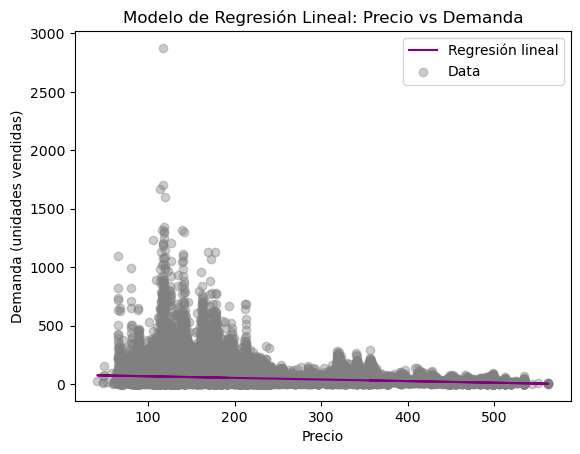

In [22]:
#Se crean dos visualizaciones
#1. Un gráfico de dispersión usando los datos de entrenamiento
#2. Un gráfico de líneas para predecir la demanda a partir del precio 
plt.plot(X_entrena, modelo.predict(X_entrena), color="purple", label="Regresión lineal")
plt.scatter(X_entrena, y_entrena, color="gray", alpha=0.4, label="Data")

plt.xlabel("Precio")
plt.ylabel("Demanda (unidades vendidas)")
plt.title("Modelo de Regresión Lineal: Precio vs Demanda")
plt.legend()
plt.show()